<a href="https://colab.research.google.com/github/abdulrehmanra0/NLP/blob/main/Twitter_Sentiment_analysis_on_random_pakistani_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('Random Tweets from Pakistan- Cleaned- Anonymous.csv', encoding='ISO-8859-1')


In [ ]:
df.head()

,Unnamed: 0,created_at_tweet,full_text,retweet_count,favorite_count,reply_count,location
0,0,Wed Jul 03 07:20:15 +0000 2019,ØªÛØ±Ø§ ÙÛÚØ± Ù ÛØ±Ø§ ÙÛÚØ± ÙÙØ§Ø² Ø...,226,1097,127,"Punjab, Pakistan"
1,1,Fri Jul 02 02:50:53 +0000 2021,"Happy birthday to my brother n boss , May you ...",54,273,9,"Punjab, Pakistan"
2,2,Fri Jul 02 12:12:53 +0000 2021,â¤ï¸â¤ï¸,50,131,13,"Punjab, Pakistan"
3,3,Tue Oct 15 22:29:16 +0000 2019,`suspicious Â°jikook au jimin'in yaÅadÄ±ÄÄ± ...,522,2134,86,"Ä°stanbul, TÃ¼rkiye"
4,4,Wed May 13 04:34:31 +0000 2020,Speaking of @SpiderMan... ð https://t.co/...,74,535,11,Follow the ATP Tour â¡


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202202 entries, 0 to 202201
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        202202 non-null  int64 
 1   created_at_tweet  202160 non-null  object
 2   full_text         202151 non-null  object
 3   retweet_count     124134 non-null  object
 4   favorite_count    144899 non-null  object
 5   reply_count       97743 non-null   object
 6   location          130862 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.8+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0               0
created_at_tweet        42
full_text               51
retweet_count        78068
favorite_count       57303
reply_count         104459
location             71340
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'created_at_tweet', 'full_text', 'retweet_count',
       'favorite_count', 'reply_count', 'location'],
      dtype='object')

In [ ]:
columns_to_drop = ['id', 'user_name', 'user_location', 'user_description', 'user_created',
                   'user_followers', 'user_friends', 'user_favourites', 'user_verified',
                   'date', 'hashtags', 'source', 'retweets', 'favorites', 'is_retweet']

# Use `errors='ignore'` to avoid KeyError if some columns are not found
text_df = df.drop(columns_to_drop, axis=1, errors='ignore')
print(text_df.head())


   Unnamed: 0                created_at_tweet  \
0           0  Wed Jul 03 07:20:15 +0000 2019   
1           1  Fri Jul 02 02:50:53 +0000 2021   
2           2  Fri Jul 02 12:12:53 +0000 2021   
3           3  Tue Oct 15 22:29:16 +0000 2019   
4           4  Wed May 13 04:34:31 +0000 2020   

                                           full_text retweet_count  \
0  ØªÛØ±Ø§ ÙÛÚØ± ÙÛØ±Ø§ ÙÛÚØ± ÙÙØ§Ø² Ø...           226   
1  Happy birthday to my brother n boss , May you ...            54   
2                                       â¤ï¸â¤ï¸            50   
3  `suspicious Â°jikook au jimin'in yaÅadÄ±ÄÄ± ...           522   
4  Speaking of @SpiderMan... ð   https://t.co/...            74   

  favorite_count reply_count                 location  
0           1097         127         Punjab, Pakistan  
1            273           9         Punjab, Pakistan  
2            131          13         Punjab, Pakistan  
3           2134          86      Ä°stanbul, TÃ¼rkiye  
4   

In [ ]:
print(text_df.columns)


Index(['Unnamed: 0', 'created_at_tweet', 'full_text', 'retweet_count',
       'favorite_count', 'reply_count', 'location'],
      dtype='object')


In [ ]:
print(text_df['full_text'].iloc[0], "\n")
print(text_df['full_text'].iloc[1], "\n")
print(text_df['full_text'].iloc[2], "\n")
print(text_df['full_text'].iloc[3], "\n")
print(text_df['full_text'].iloc[4], "\n")


ØªÛØ±Ø§ ÙÛÚØ± ÙÛØ±Ø§ ÙÛÚØ± ÙÙØ§Ø² Ø´Ø±ÛÙ ÙÙØ§Ø² Ø´Ø±ÛÙâ¤ï¸  Ú©ÛØ§ Ø¢Ù¾Ú©Ø§ Ø¨Ú¾Û Ú¾ÛØØØ @MaryamNSharif @Tanverhussan @SenPervaiz https://t.co/mDyOGs3sXv 

Happy birthday to my brother n boss , May you have many many moreððð, you are Gem ð #HappyBirthdayAtifRauf 

â¤ï¸â¤ï¸ 

`suspicious Â°jikook au jimin'in yaÅadÄ±ÄÄ± kasabada aniden baÅlayan cinayetler, onun kendisini sÃ¼rekli takip eden yeni komÅusu jungkook'tan ÅÃ¼phelenmesine neden olur https://t.co/QJA6XaDtVh 

Speaking of @SpiderMan... ð   https://t.co/uGJFiREUl8 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202202 entries, 0 to 202201
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        202202 non-null  int64 
 1   created_at_tweet  202160 non-null  object
 2   full_text         202151 non-null  object
 3   retweet_count     124134 non-null  object
 4   favorite_count    144899 non-null  object
 5   reply_count       97743 non-null   object
 6   location          130862 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.8+ MB


In [ ]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re

def data_processing(text):
    # Check if the input is a string
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)
        text = re.sub(r'\@w+|\#','', text)
        text = re.sub(r'[^\w\s]','', text)
        # Add other text processing steps here if necessary
    else:
        # If text is not a string, you could choose to return an empty string
        # or some placeholder text, or perhaps return the text as is
        text = ""
    return text


In [ ]:
text_df = text_df.drop_duplicates('full_text')


In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
stemmer = PorterStemmer()

def stemming(data):
    if isinstance(data, str):  # Check if data is a string
        text = [stemmer.stem(word) for word in data.split()]  # Split text into words before stemming
        return ' '.join(text)  # Join stemmed words back into a string
    else:
        return data  # Return data as is if it's not a string (NaN)


In [ ]:
text_df.head()

,Unnamed: 0,created_at_tweet,full_text,retweet_count,favorite_count,reply_count,location
0,0,Wed Jul 03 07:20:15 +0000 2019,ØªÛØ±Ø§ ÙÛÚØ± Ù ÛØ±Ø§ ÙÛÚØ± ÙÙØ§Ø² Ø...,226,1097,127,"Punjab, Pakistan"
1,1,Fri Jul 02 02:50:53 +0000 2021,"Happy birthday to my brother n boss , May you ...",54,273,9,"Punjab, Pakistan"
2,2,Fri Jul 02 12:12:53 +0000 2021,â¤ï¸â¤ï¸,50,131,13,"Punjab, Pakistan"
3,3,Tue Oct 15 22:29:16 +0000 2019,`suspicious Â°jikook au jimin'in yaÅadÄ±ÄÄ± ...,522,2134,86,"Ä°stanbul, TÃ¼rkiye"
4,4,Wed May 13 04:34:31 +0000 2020,Speaking of @SpiderMan... ð https://t.co/...,74,535,11,Follow the ATP Tour â¡


In [ ]:
print(text_df['full_text'].iloc[0],"\n")
print(text_df['full_text'].iloc[1],"\n")
print(text_df['full_text'].iloc[2],"\n")
print(text_df['full_text'].iloc[3],"\n")
print(text_df['full_text'].iloc[4],"\n")

ØªÛØ±Ø§ ÙÛÚØ± ÙÛØ±Ø§ ÙÛÚØ± ÙÙØ§Ø² Ø´Ø±ÛÙ ÙÙØ§Ø² Ø´Ø±ÛÙâ¤ï¸  Ú©ÛØ§ Ø¢Ù¾Ú©Ø§ Ø¨Ú¾Û Ú¾ÛØØØ @MaryamNSharif @Tanverhussan @SenPervaiz https://t.co/mDyOGs3sXv 

Happy birthday to my brother n boss , May you have many many moreððð, you are Gem ð #HappyBirthdayAtifRauf 

â¤ï¸â¤ï¸ 

`suspicious Â°jikook au jimin'in yaÅadÄ±ÄÄ± kasabada aniden baÅlayan cinayetler, onun kendisini sÃ¼rekli takip eden yeni komÅusu jungkook'tan ÅÃ¼phelenmesine neden olur https://t.co/QJA6XaDtVh 

Speaking of @SpiderMan... ð   https://t.co/uGJFiREUl8 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158623 entries, 0 to 202201
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        158623 non-null  int64 
 1   created_at_tweet  158622 non-null  object
 2   full_text         158622 non-null  object
 3   retweet_count     107983 non-null  object
 4   favorite_count    122666 non-null  object
 5   reply_count       90420 non-null   object
 6   location          112326 non-null  object
dtypes: int64(1), object(6)
memory usage: 9.7+ MB


In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
from textblob import TextBlob

def polarity(text):
    if isinstance(text, str):  # Check if text is a string
        return TextBlob(text).sentiment.polarity
    else:
        return 0  # Return a default polarity value (e.g., 0) for NaN values


In [ ]:
text_df.head(10)

,Unnamed: 0,created_at_tweet,full_text,retweet_count,favorite_count,reply_count,location
0,0,Wed Jul 03 07:20:15 +0000 2019,ØªÛØ±Ø§ ÙÛÚØ± Ù ÛØ±Ø§ ÙÛÚØ± ÙÙØ§Ø² Ø...,226,1097,127,"Punjab, Pakistan"
1,1,Fri Jul 02 02:50:53 +0000 2021,"Happy birthday to my brother n boss , May you ...",54,273,9,"Punjab, Pakistan"
2,2,Fri Jul 02 12:12:53 +0000 2021,â¤ï¸â¤ï¸,50,131,13,"Punjab, Pakistan"
3,3,Tue Oct 15 22:29:16 +0000 2019,`suspicious Â°jikook au jimin'in yaÅadÄ±ÄÄ± ...,522,2134,86,"Ä°stanbul, TÃ¼rkiye"
4,4,Wed May 13 04:34:31 +0000 2020,Speaking of @SpiderMan... ð https://t.co/...,74,535,11,Follow the ATP Tour â¡
5,5,Thu May 14 13:16:49 +0000 2020,"Alexa, skip to 2021",0,2,0,"Lahore, Pakistan"
6,6,Fri Jul 02 12:58:15 +0000 2021,Jb tm moon lover ho gy to sooraj to tappy ga n...,0,0,0,"Lahore, Pakistan"
7,7,Fri Jul 02 12:59:32 +0000 2021,Alexa skip to 2022 now,0,0,0,"Lahore, Pakistan"
8,8,Sun Jul 05 01:41:22 +0000 2020,"But this was one of my first shoots, about 6 y...",0,14,1,"Atlanta, GA"
9,9,Sun Jul 12 11:53:30 +0000 2020,Trying phoneix in 140 ping ð¥ https://t.co/C...,0,2,0,"Multan, Pakistan"


In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [ ]:
text_df['polarity'] = text_df['full_text'].apply(polarity)
text_df['sentiment'] = text_df['polarity'].apply(sentiment)


In [ ]:
text_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

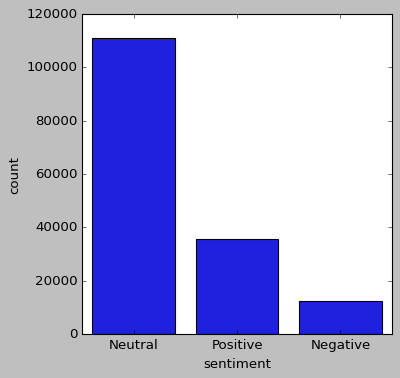

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

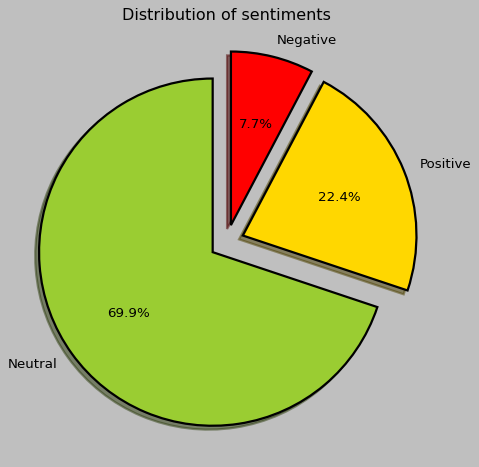

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Unnamed: 0,created_at_tweet,full_text,retweet_count,favorite_count,reply_count,location,polarity,sentiment
57710,1170,2021-06-28T22:58:24.000Z,"Being ""Father"" of a ""Daughter"" is the greatest...",NaN,1,NaN,"Islamabad, Pakistan",1.0,Positive
60317,3777,2021-06-28T21:23:28.000Z,This could be the greatest footballing meme in...,NaN,5,NaN,"Karachi Port, Karachi, Pakistan",1.0,Positive
169904,8720,2021-07-02 12:46:18 Pakistan Standard Time,"@PUNEETMITT Hi, Puneet! Thank you for your won...",0,1,1.0,NaN,1.0,Positive
53438,7057,2021-06-29 02:28:51+00:00,@ajitsuryak @caniravkaria @saketreddy @nakulvi...,NaN,0,0,NaN,1.0,Positive
120498,20486,7/2/2021 18:48,RT @URuciferus: BEST PLAYER OF THE TOURNAMENT ...,NaN,NaN,NaN,NaN,1.0,Positive


In [ ]:
print(pos_tweets.columns)


Index(['Unnamed: 0', 'created_at_tweet', 'full_text', 'retweet_count',
       'favorite_count', 'reply_count', 'location', 'polarity', 'sentiment'],
      dtype='object')


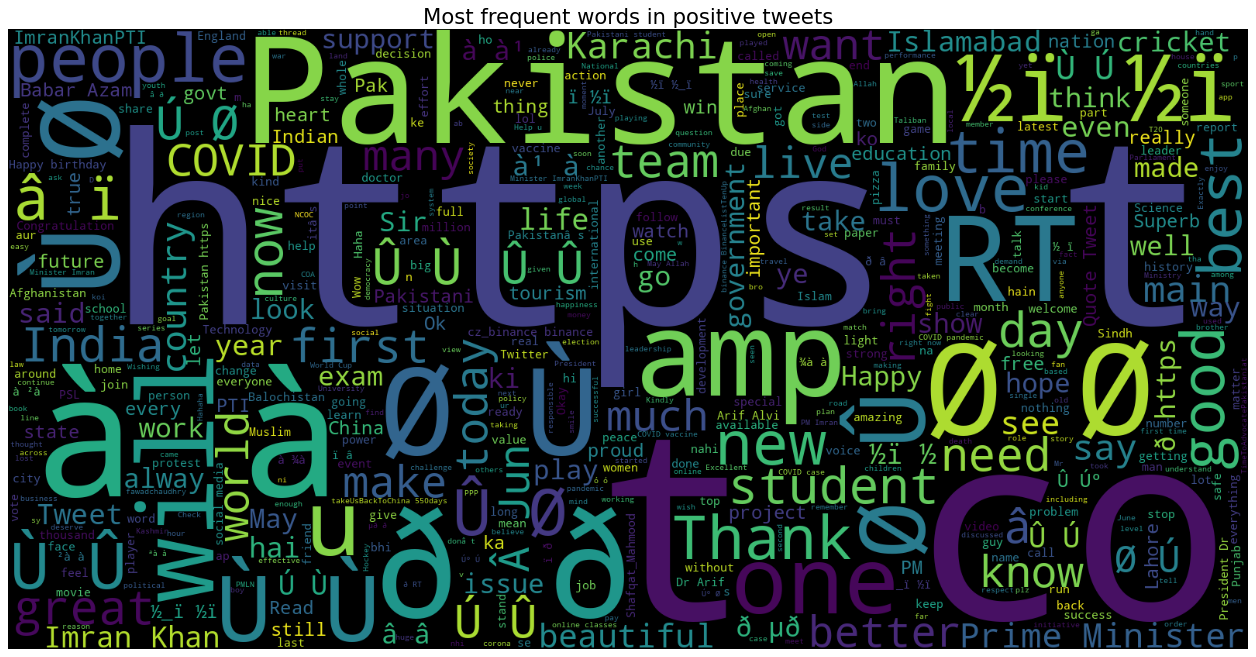

In [ ]:
text = ' '.join([word for word in pos_tweets['full_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [ ]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Unnamed: 0,created_at_tweet,full_text,retweet_count,favorite_count,reply_count,location,polarity,sentiment
147136,8312,2021-07-02 09:44:27+00:00,@Abhi93Tweets @RoflGandhi_ @mlkhattar Seems fe...,NaN,NaN,NaN,NaN,-6.938894e-18,Negative
34668,11510,Wed Jun 30 08:17:25 +0000 2021,Aiwan-e-Sadr of Pakistan is now completely shi...,38,127,NaN,Pakistan,-6.938894e-18,Negative
82876,5138,Sat Jul 03 18:49:41 +0000 2021,"They believe in is false. For some, actually ...",0,3,1,"Lahore, Pakistan",-9.912706e-18,Negative
50109,3728,2021-06-28 17:58:12+00:00,#PMLN Good in building stories but on weak fou...,NaN,0,0,NaN,-1.110223e-17,Negative
85393,7655,Sat Jul 03 18:50:03 +0000 2021,Be careful about who you invest your time in. ...,0,1,0,"Islamabad, Pakistan",-1.387779e-17,Negative


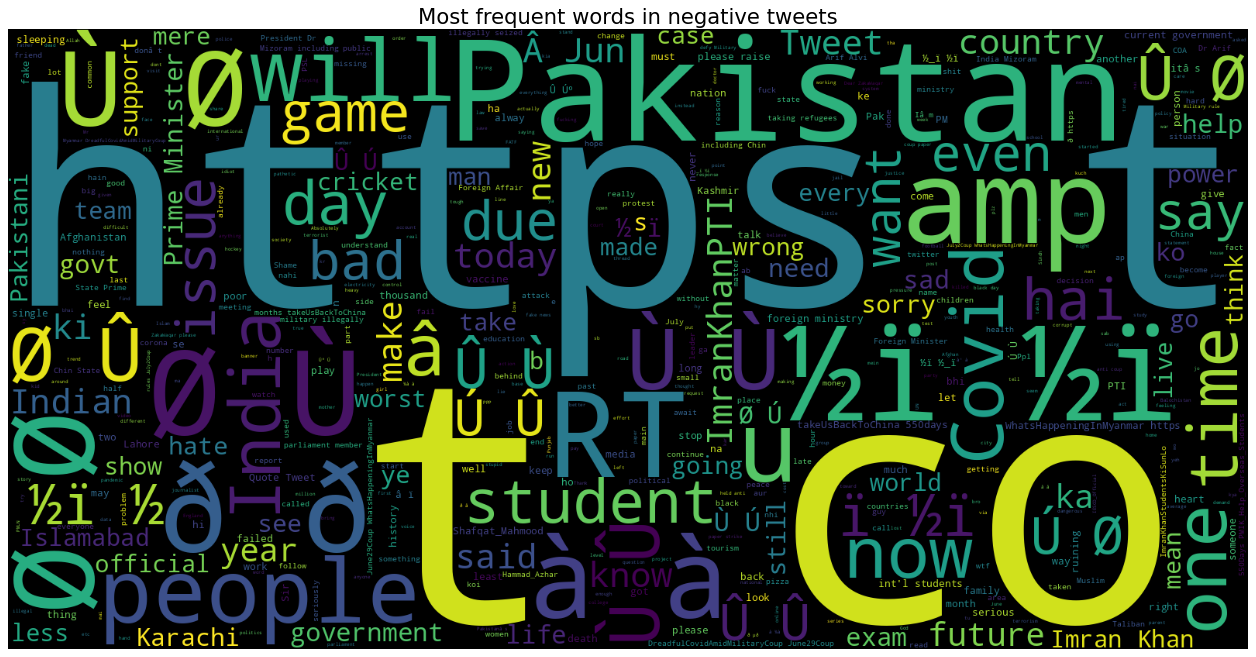

In [ ]:
text = ' '.join([word for word in neg_tweets['full_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [ ]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Unnamed: 0,created_at_tweet,full_text,retweet_count,favorite_count,reply_count,location,polarity,sentiment
0,0,Wed Jul 03 07:20:15 +0000 2019,ØªÛØ±Ø§ ÙÛÚØ± Ù ÛØ±Ø§ ÙÛÚØ± ÙÙØ§Ø² Ø...,226,1097,127,"Punjab, Pakistan",0.0,Neutral
136875,8051,Sun Jul 04 18:23:28 +0000 2021,@Affi_here ð¯ð¯,0,0,0.0,"Islamabad, Pakistan",0.0,Neutral
136886,8062,Sun Jul 04 18:33:45 +0000 2021,@underrated_hun faisal qureshi ny kafi word bo...,0,1,1.0,"Islamabad, Pakistan",0.0,Neutral
136885,8061,Sun Jul 04 18:33:11 +0000 2021,@Gurria_ki_baten ð,0,1,0.0,"Islamabad, Pakistan",0.0,Neutral
136884,8060,Sun Jul 04 18:33:02 +0000 2021,@saleem_phenku ð¯,0,1,0.0,"Islamabad, Pakistan",0.0,Neutral


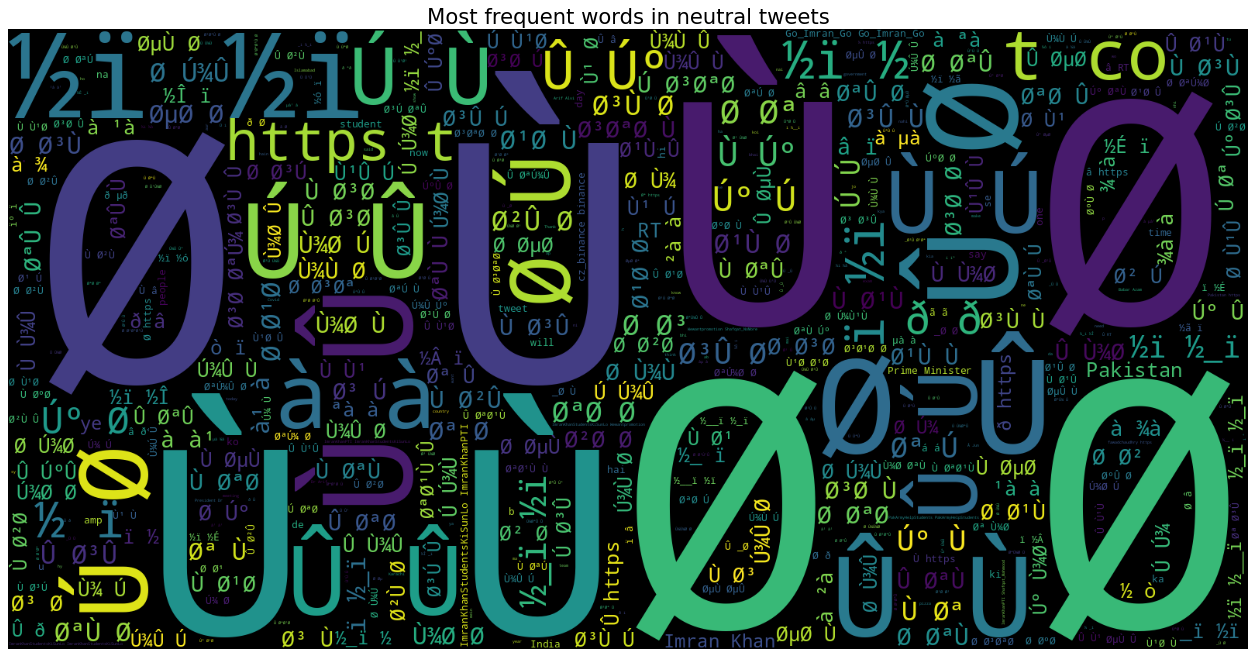

In [ ]:
text = ' '.join([str(word) for word in neutral_tweets['full_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [ ]:
text_df.dropna(subset=['full_text'], inplace=True)
vect = CountVectorizer(ngram_range=(1, 2)).fit(text_df['full_text'])




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Example data
corpus = ["This is the first document.",
          "This document is the second document.",
          "And this is the third one.",
          "Is this the first document?"]

# Initialize CountVectorizer
vect = CountVectorizer()

# Fit and transform the data
X = vect.fit_transform(corpus)

# Access the feature names
feature_names = vect.get_feature_names_out()

# Print information about features
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))


Number of features: 9

First 20 features:
 ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [ ]:
X = text_df['full_text']
Y = text_df['sentiment']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (126897, 9)
Size of y_train: (126897,)
Size of x_test: (31725, 9)
Size of y_test: (31725,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 74.12%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[    0  1681   742]
 [    0 21442   874]
 [    2  4913  2071]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      2423
     Neutral       0.76      0.96      0.85     22316
    Positive       0.56      0.30      0.39      6986

    accuracy                           0.74     31725
   macro avg       0.44      0.42      0.41     31725
weighted avg       0.66      0.74      0.68     31725



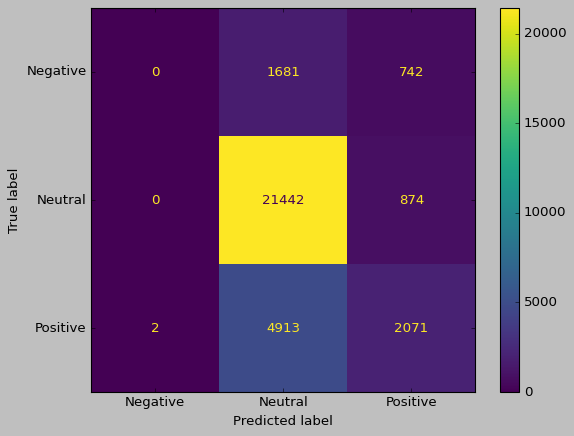

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 0.01}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:

logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 74.13%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[    0  1688   735]
 [    0 21462   854]
 [    1  4929  2056]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      2423
     Neutral       0.76      0.96      0.85     22316
    Positive       0.56      0.29      0.39      6986

    accuracy                           0.74     31725
   macro avg       0.44      0.42      0.41     31725
weighted avg       0.66      0.74      0.68     31725



In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 73.92%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[    0  1740   683]
 [    0 21538   778]
 [    0  5073  1913]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      2423
     Neutral       0.76      0.97      0.85     22316
    Positive       0.57      0.27      0.37      6986

    accuracy                           0.74     31725
   macro avg       0.44      0.41      0.41     31725
weighted avg       0.66      0.74      0.68     31725



In [ ]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 0.01}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 73.92%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[    0  1740   683]
 [    0 21538   778]
 [    0  5073  1913]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      2423
     Neutral       0.76      0.97      0.85     22316
    Positive       0.57      0.27      0.37      6986

    accuracy                           0.74     31725
   macro avg       0.44      0.41      0.41     31725
weighted avg       0.66      0.74      0.68     31725

